In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage

In [2]:
lp_cand = cv.imread("LP_filter-candidate.jpg",0)
high_cont = cv.imread("High-Contrast.jpg",0)
median_list = []
median1 = cv.imread("Picture1_median_filtering.png")
median2 = cv.imread("Picture2_median_filtering.jpg")
median3 = cv.imread("Picture3_median_filtering.jpg")
median4 = cv.imread("Picture4_median_filtering.jpg")
median_list.append(median1)
median_list.append(median2)
median_list.append(median3)
median_list.append(median4)

## 1. Apply a low pass mask

We apply a low-pass mask onto the image LP_filter-candidate.jpg

In [3]:
lp_kernel = np.array([[1,1,1],[1,2,1],[1,1,1]]) / 10
lp_list = []
lp_list.append(lp_cand)
for i in range (0,5):
    filtered = cv.filter2D(lp_list[i], -1, lp_kernel)
    lp_list.append(filtered)

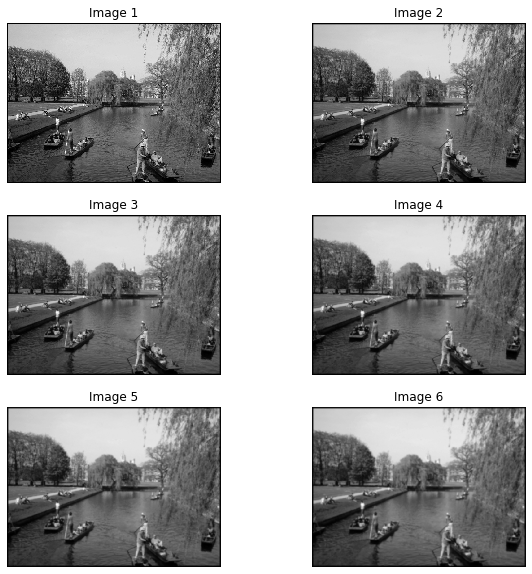

In [4]:
fig = plt.figure(figsize=(10,10))
col = 2
rows = 3
for i in range(1, rows*col + 1):
    img = lp_list[i-1]
    fig.add_subplot(rows, col, i)
    plt.title('Image ' + str(i))
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

This specific low-pass filter does not have a large effect per application, and each step is hard to notice. Once the filter hs been applied a few times however, you can start noticing a clear blurring effect.

## 2. Apply a high pass mask

We apply a high-pass mask onto the image High-Contrast.jpg

In [5]:
hp_kernel = np.array([[-1.0,-1.0,-1.0],[-1.0,9.0,-1.0],[-1.0,-1.0,-1.0]])
hp_filtered = cv.filter2D(high_cont, -1, hp_kernel)

hp_list = []
hp_list.append(high_cont)
for i in range(0,3):
    filtered = cv.filter2D(hp_list[-1], -1, hp_kernel)
    hp_list.append(filtered)

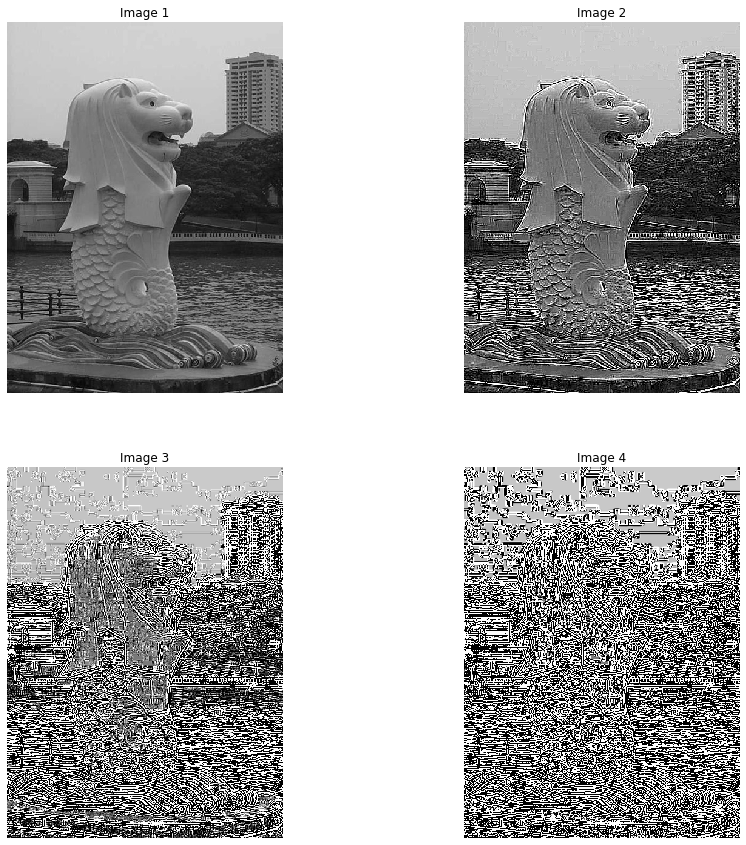

In [6]:
fig = plt.figure(figsize=(15,15))
col = 2
rows = 2
for i in range(1, rows*col + 1):
    img = hp_list[i-1]
    fig.add_subplot(rows, col, i)
    plt.title('Image ' + str(i))
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

Compared to the low-pass, this one has an immediate effect. At least on this image. On the other hand this image quickly becomes very poor in quality.

High-pass filters are used to sharpen an image.

## Apply a Gaussian lowpass filter

Apply the filter to the LP_filter-candidate.jpg

In [7]:
gauss1 = ndimage.gaussian_filter(lp_cand, sigma=2)
gauss2 = ndimage.gaussian_filter(lp_cand, sigma=4)
gauss3 = ndimage.gaussian_filter(lp_cand, sigma=8)
gauss4 = ndimage.gaussian_filter(lp_cand, sigma=16)

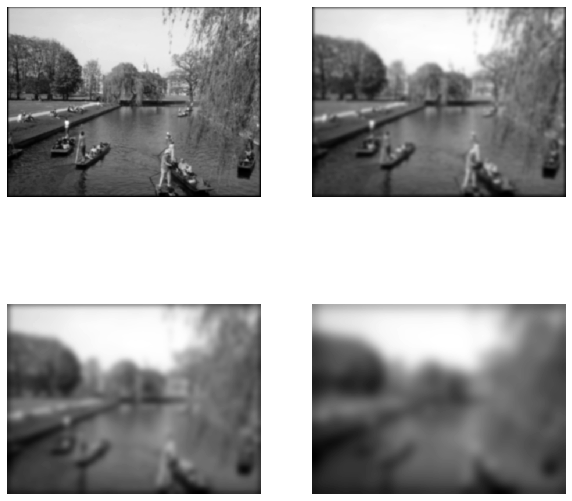

In [8]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(2,2,1)
plt.imshow(gauss1, cmap='gray')
plt.axis('off')
fig.add_subplot(2,2,2)
plt.imshow(gauss2,cmap='gray')
plt.axis('off')
fig.add_subplot(2,2,3)
plt.imshow(gauss3, cmap='gray')
plt.axis('off')
fig.add_subplot(2,2,4)
plt.imshow(gauss4,cmap='gray')
plt.axis('off')
plt.show()

The gaussian low-pass filter is commonly used to reduce the level of noise in an image, for example prior to edge detection. Compared to the last image in the earlier low-pass filter, the sigma=4 image is slightly more blurred and less detailed.

## Apply median filter

### 3x3 median filter

In [10]:
median_3 = []
median_7 = []
median_11 = []
i = 0
for img in median_list:
    filtered = cv.medianBlur(img, 3)
    filtered2 = cv.medianBlur(img, 7)
    filtered3 = cv.medianBlur(img, 11)
    median_3.append(median_list[i])
    median_3.append(filtered)
    median_7.append(median_list[i])
    median_7.append(filtered2)
    median_11.append(median_list[i])
    median_11.append(filtered3)
    i += 1

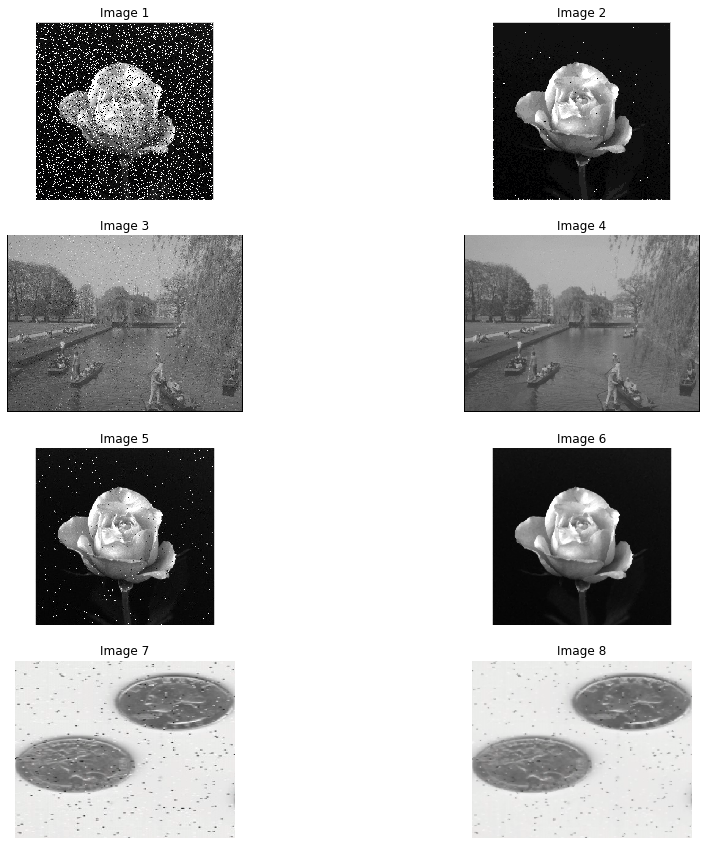

In [11]:
fig = plt.figure(figsize=(15,15))
col = 2
rows = 4
for i in range(1, rows*col + 1):
    img = median_3[i-1]
    fig.add_subplot(rows, col, i)
    plt.title('Image ' + str(i))
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

The 3x3 filter works well on the second flower image and the image of the river. It properly removes the noise. However on the first and last image, it doesn't work. In the first image it's probably due to the density of the noise.

The last image doesn't change much. The noise on the coins is slightly faded but for the most part the image is unchanged.

### 7x7 Median Filter

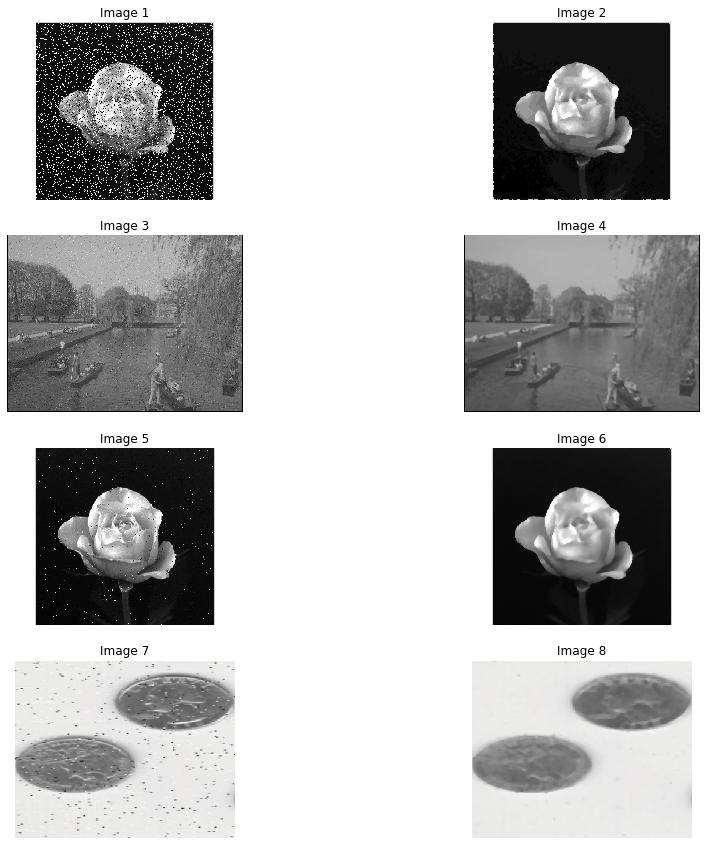

In [12]:
fig = plt.figure(figsize=(15,15))
col = 2
rows = 4
for i in range(1, rows*col + 1):
    img = median_7[i-1]
    fig.add_subplot(rows, col, i)
    plt.title('Image ' + str(i))
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

For the first image, due to the noise-density, some parts of the edge get the color of the noise. 

The second image still works like normal, although it loses some sharpness compared to the 3x3.

The third image still works fine and the filter successfully removes the noise.

The last image is a lot better than the 3x3 filter. It removes nearly all the noise, but the coins also lose some sharpness.

### 11x11 Median Filter

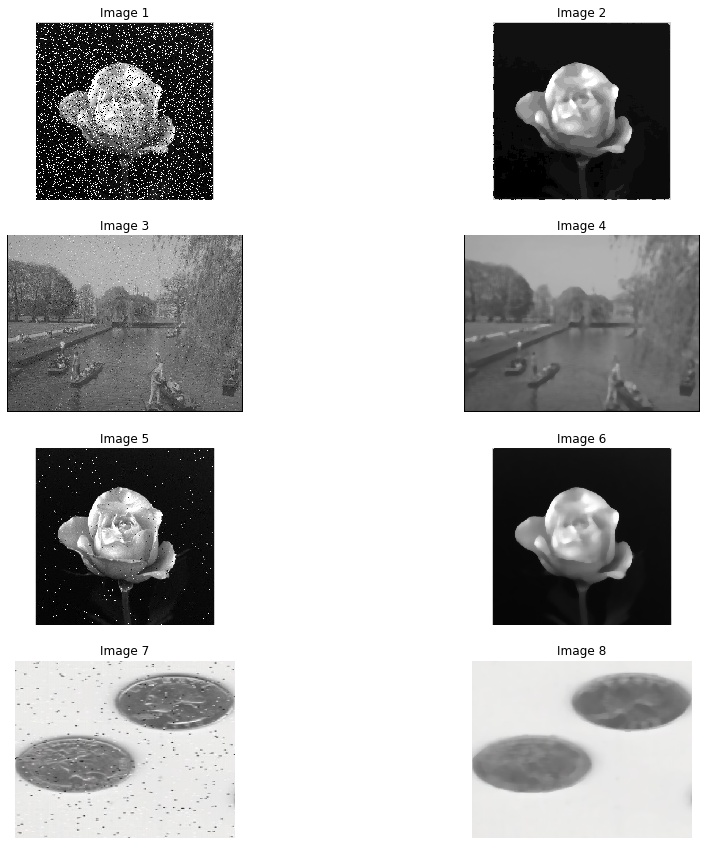

In [13]:
fig = plt.figure(figsize=(15,15))
col = 2
rows = 4
for i in range(1, rows*col + 1):
    img = median_11[i-1]
    fig.add_subplot(rows, col, i)
    plt.title('Image ' + str(i))
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

All these images are mostly similar to the 7x7 filter. The mani difference is that they are simply more blurred. Specifically in the last image, the one with the coins, almost all noise in gone whereas in the 7x7 you could still see some darker pixels.